In [1]:
import numpy as np

In [68]:
import math
from collections import Counter


# TODO using numpy
def entropy(y):
    counts = Counter(y)
    t = sum(counts.values())    
    if t <= 0: return 0.0
    e = sum([0 if c <= 0 else -(c/t)*math.log(c/t, 2) for _, c in counts.items()])
    return e
    

In [69]:
entropy({'a': 7, 'b': 7, 'c': 6})

1.5812908992306927

In [23]:
math.inf


inf

In [73]:
class Node:
    def __init__(self, split_col, split_val, counts):
        self.split_col = split_col
        self.split_val = split_val
        self.counts = counts
        self.left = None
        self.right = None
        
    def __str__(self):
        return f"(X[{self.split_col}]<={self.split_val}, entropy: {entropy(self.counts)}, values:{self.counts})"
        
    
    

In [71]:
def build_tree(X, y) -> Node:
    if len(X) <= 0:
        raise Error(f"Empty rows")
    
    # check whether we should stop
    counts = Counter(y)
    if len(counts) <= 1:
        root = Node(-1, 0.0, counts)
        print(f"Generate leaf: {root}")
        return root
        
    left, right, split_col, split_val = best_split(X, y)
    l_node = build_tree(left[0], left[1])
    r_node = build_tree(right[0], right[1])
    root = Node(split_col, split_val, counts)
    root.left = l_node
    root.right = r_node
    print(f"Generate root: {root}")
    return root
    

In [25]:
0 > -math.inf

True

In [54]:
def best_split(X, y):
    _, cols = X.shape
    
    best_split_col = -1
    best_split_val = 0
    best_left = None
    best_right = None
    best_metric = math.inf
    
    for c in range(cols):
        left, right, split_val, metric = split_by_col(X, y, c)
        if metric < best_metric:
            best_split_col = c
            best_split_val = split_val
            best_left = left
            best_right = right
            best_metric = metric
    
    return best_left, best_right, best_split_col, best_split_val
    

In [58]:
def split_by_col(X, y, c):
    sz = len(X)
    
    best_split_val = 0
    best_left = None
    best_right = None
    best_metric = math.inf
    
    for split_val in X[:, c]:
        index = X[:, c] > split_val
        right_X = X[index, :]
        if len(right_X) <= 0:
            continue
        
        left_X = X[~index, :]
        left_y = y[~index]
        right_y = y[index]
        
        m = (entropy(left_y) * len(left_y) + entropy(right_y) * len(right_y))/sz
        print(f"Entropy is {m} by splitting col {c} with value {split_val}")
        if m < best_metric:
            best_split_val = split_val
            best_left = (left_X, left_y)
            best_right = (right_X, right_y)
            best_metric = m
    return best_left, best_right, best_split_val, best_metric
        

In [29]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=20, centers=3, n_features=2)

In [30]:
X, y

(array([[-4.17223480e-03, -6.05915594e+00],
        [-1.91679757e+00, -8.21317944e+00],
        [-3.11056839e+00, -1.02649129e+01],
        [ 9.17293727e-03, -7.54837805e+00],
        [ 2.26011638e-01, -8.90371772e+00],
        [-6.36879535e+00, -8.53950463e-01],
        [-7.09455578e+00, -9.76382379e-01],
        [-5.02848505e+00, -9.33640574e-01],
        [-7.40841705e+00, -2.12886739e-01],
        [-4.47268912e+00, -9.40130538e+00],
        [-5.45962512e+00, -3.30801268e-01],
        [-4.89615212e+00, -1.11132684e+01],
        [-1.64916548e+00, -6.34966300e+00],
        [-4.44973799e+00, -8.75353772e+00],
        [-3.59412176e+00, -8.58109550e+00],
        [-2.90483082e+00, -8.80183103e+00],
        [-6.86270123e+00, -1.12842853e+00],
        [-1.16059081e+00, -8.38056880e+00],
        [-4.79912644e+00, -4.38722832e+00],
        [ 2.79592779e+00, -6.49208556e+00]]),
 array([2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2]))

In [60]:
best_left, best_right, best_split_val, best_metric = split_by_col(X, y, 0)
best_left, best_right, best_split_val, best_metric

Entropy is 0.8813023948088479 by splitting col 0 with value -0.004172234802148789
Entropy is 0.48520302639196167 by splitting col 0 with value -1.9167975657726637
Entropy is 0.6324500174424388 by splitting col 0 with value -3.110568392514888
Entropy is 0.9619386055438508 by splitting col 0 with value 0.009172937271457127
Entropy is 1.032720447760874 by splitting col 0 with value 0.2260116376982556
Entropy is 0.8346827415538323 by splitting col 0 with value -6.368795354123499
Entropy is 0.9803787110602469 by splitting col 0 with value -7.094555784916215
Entropy is 0.6287437377929048 by splitting col 0 with value -5.028485050257312
Entropy is 1.041092796501926 by splitting col 0 with value -7.408417051711574
Entropy is 0.6173228707381068 by splitting col 0 with value -4.472689122823362
Entropy is 0.7431265398328869 by splitting col 0 with value -5.459625121428562
Entropy is 0.7357021122141091 by splitting col 0 with value -4.89615212353407
Entropy is 0.6689005464879383 by splitting col 0

((array([[ -1.91679757,  -8.21317944],
         [ -3.11056839, -10.26491291],
         [ -6.36879535,  -0.85395046],
         [ -7.09455578,  -0.97638238],
         [ -5.02848505,  -0.93364057],
         [ -7.40841705,  -0.21288674],
         [ -4.47268912,  -9.40130538],
         [ -5.45962512,  -0.33080127],
         [ -4.89615212, -11.11326835],
         [ -4.44973799,  -8.75353772],
         [ -3.59412176,  -8.5810955 ],
         [ -2.90483082,  -8.80183103],
         [ -6.86270123,  -1.12842853],
         [ -4.79912644,  -4.38722832]]),
  array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])),
 (array([[-4.17223480e-03, -6.05915594e+00],
         [ 9.17293727e-03, -7.54837805e+00],
         [ 2.26011638e-01, -8.90371772e+00],
         [-1.64916548e+00, -6.34966300e+00],
         [-1.16059081e+00, -8.38056880e+00],
         [ 2.79592779e+00, -6.49208556e+00]]),
  array([2, 2, 2, 2, 2, 2])),
 -1.9167975657726637,
 0.48520302639196167)

In [61]:
best_left, best_right, best_split_col, best_split_val = best_split(X, y)
best_left, best_right, best_split_col, best_split_val


Entropy is 0.8813023948088479 by splitting col 0 with value -0.004172234802148789
Entropy is 0.48520302639196167 by splitting col 0 with value -1.9167975657726637
Entropy is 0.6324500174424388 by splitting col 0 with value -3.110568392514888
Entropy is 0.9619386055438508 by splitting col 0 with value 0.009172937271457127
Entropy is 1.032720447760874 by splitting col 0 with value 0.2260116376982556
Entropy is 0.8346827415538323 by splitting col 0 with value -6.368795354123499
Entropy is 0.9803787110602469 by splitting col 0 with value -7.094555784916215
Entropy is 0.6287437377929048 by splitting col 0 with value -5.028485050257312
Entropy is 1.041092796501926 by splitting col 0 with value -7.408417051711574
Entropy is 0.6173228707381068 by splitting col 0 with value -4.472689122823362
Entropy is 0.7431265398328869 by splitting col 0 with value -5.459625121428562
Entropy is 0.7357021122141091 by splitting col 0 with value -4.89615212353407
Entropy is 0.6689005464879383 by splitting col 0

((array([[-4.17223480e-03, -6.05915594e+00],
         [-1.91679757e+00, -8.21317944e+00],
         [-3.11056839e+00, -1.02649129e+01],
         [ 9.17293727e-03, -7.54837805e+00],
         [ 2.26011638e-01, -8.90371772e+00],
         [-4.47268912e+00, -9.40130538e+00],
         [-4.89615212e+00, -1.11132684e+01],
         [-1.64916548e+00, -6.34966300e+00],
         [-4.44973799e+00, -8.75353772e+00],
         [-3.59412176e+00, -8.58109550e+00],
         [-2.90483082e+00, -8.80183103e+00],
         [-1.16059081e+00, -8.38056880e+00],
         [ 2.79592779e+00, -6.49208556e+00]]),
  array([2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2])),
 (array([[-6.36879535, -0.85395046],
         [-7.09455578, -0.97638238],
         [-5.02848505, -0.93364057],
         [-7.40841705, -0.21288674],
         [-5.45962512, -0.33080127],
         [-6.86270123, -1.12842853],
         [-4.79912644, -4.38722832]]),
  array([0, 0, 0, 0, 0, 0, 0])),
 1,
 -6.059155937425415)

In [74]:
root = build_tree(X, y)

Entropy is 1.2714505945142922 by splitting col 0 with value -0.004172234802148789
Entropy is 0.7 by splitting col 0 with value -1.9167975657726637
Entropy is 0.9124325037743448 by splitting col 0 with value -3.110568392514888
Entropy is 1.3877840558577583 by splitting col 0 with value 0.009172937271457127
Entropy is 1.4899006686092429 by splitting col 0 with value 0.2260116376982556
Entropy is 1.2041926519553183 by splitting col 0 with value -6.368795354123499
Entropy is 1.4143875046397327 by splitting col 0 with value -7.094555784916215
Entropy is 0.9070854725038145 by splitting col 0 with value -5.028485050257312
Entropy is 1.501979414618551 by splitting col 0 with value -7.408417051711574
Entropy is 0.8906086442412052 by splitting col 0 with value -4.472689122823362
Entropy is 1.0721049737698805 by splitting col 0 with value -5.459625121428562
Entropy is 1.0613937888628309 by splitting col 0 with value -4.89615212353407
Entropy is 0.9650195012660661 by splitting col 0 with value -1.

<IPython.core.display.Javascript object>


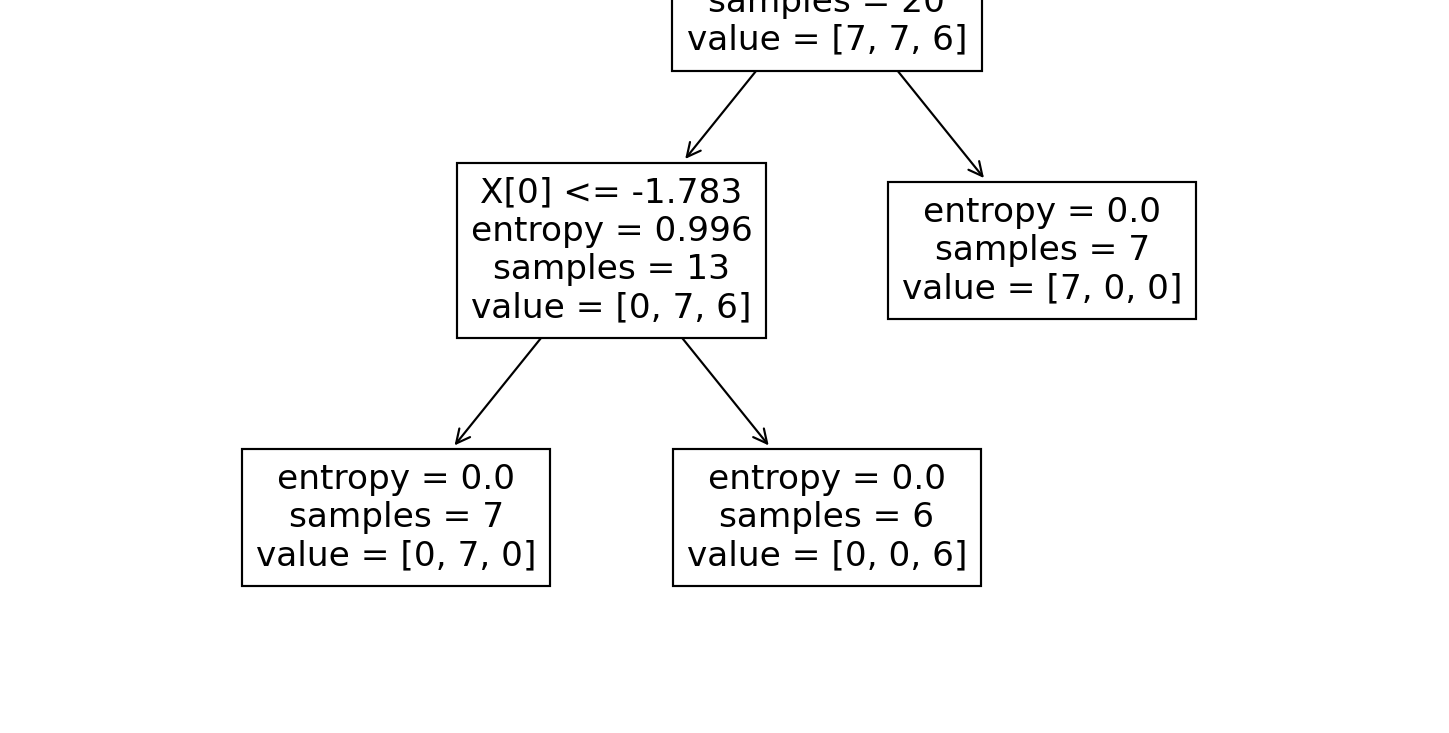

[Text(297.6, 308.0, 'X[1] <= -5.223\nentropy = 1.581\nsamples = 20\nvalue = [7, 7, 6]'),
 Text(198.4, 184.79999999999998, 'X[0] <= -1.783\nentropy = 0.996\nsamples = 13\nvalue = [0, 7, 6]'),
 Text(99.2, 61.599999999999966, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(297.6, 61.599999999999966, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(396.8, 184.79999999999998, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0]')]

In [64]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
clf = clf.fit(X, y)
tree.plot_tree(clf)